### IMDB Sentiment Analysis

#### 1 Business Problem:
##### 1.1 Description
IMDb reviews offer a rich tapestry of opinions on films. Positive reviews extol a movie's virtues, highlighting stellar performances, captivating storylines, and stunning visuals. Conversely, negative reviews criticize plot holes, poor acting, or technical flaws. These subjective assessments collectively shape a film's reputation, influencing audience expectations and decisions.

> Credits: Gemini

\_\_\_Problem Statement\_\_\_
- Given a review, indentify its polarity.
- This could be useful for instantly determining whether a review is <b> positive </b> or <b> negative </b> without requiring manual reading..

##### 1.2 Real World/Business Objectives and Constraints
- The cost of misclassification can be high as it reduces the trustworthiness of the website.
- No strict latency concerns.

### 2 Machine Learning Problem
#### 2.1 Data
##### 2.1.1 Data Overview
- Data will be in a file <b> IMDB Dataset.csv </b>
- Contains 2 columns <b> review </b> and <b> sentiment </b>.
- Size of csv file: 64 MB
- Number of rows in dataset; 50,000

##### 2.1.2 Example Data point
'review','sentiment' </br>
Phil the Alien is one of those quirky films where the humour is based around the oddness of everything rather than actual punchlines.<br /><br />At first it was very odd and pretty funny but as the movie progressed I didn't find the jokes or oddness funny anymore.<br /><br />Its a low budget film (thats never a problem in itself), there were some pretty interesting characters, but eventually I just lost interest.<br /><br />I imagine this film would appeal to a stoner who is currently partaking.<br /><br />For something similar but better try "Brother from another planet",'negative'

#### 2.2 Mapping the real world problem to an ML problem
##### 2.2.1 Type of Machine Learning Problem
- It is a binary classification problem, for a given review we have to determine its sentiment i.e either Positive Or Negative.

##### 2.2.2 Performance Metric
###### Metric(s)
- log-loss
- Binary Confusion Matrix

#### 2.3 Train and Test Construction
- We build train and test by randomly splitting in the ratio of 70:30 or 80:20.
- Whatever we choose as we have sufficient points to work with.

#### 3 Exploratory Data Analysis

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import re
from bs4 import BeautifulSoup

##### 3.1 Reading data and basic stats

In [2]:
df = pd.read_csv('IMDB Dataset.csv')
print("Number of data points: ",df.shape[0])

Number of data points:  50000


In [3]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


##### 3.2 Check for null values
- (Q): Why we remove null values?
- Imagine you're building a tower with blocks. If some blocks are missing (null values), the tower will be wobbly and might fall. So, we remove the missing blocks to make a strong tower.
- Source: Gemini

In [4]:
df.isnull().sum()

review       0
sentiment    0
dtype: int64

- We have no null data in our review.

##### 3.3 Check for duplicates and drop them
- Imagine you have a pile of cards with the same picture. Keeping all the same cards doesn't give you new information, right? So, we remove the extra cards to keep things interesting and fair.




In [5]:
df.drop_duplicates(subset={'review','sentiment'},keep='first',inplace=True)
df.shape

(49582, 2)

- We have 49582 rows of data remains after removing duplicates.

##### 3.4 Data Balance or Imbalance
- Data balance means equal amounts of data for each category. Imbalance means one category has much more data than others. Imbalanced data can trick models into favoring the larger group.

In [6]:
df['sentiment'].value_counts()

sentiment
positive    24884
negative    24698
Name: count, dtype: int64

- We have  balanced dataset.
- A balanced dataset has equal numbers of data points for each category. This helps models learn fairly without being biased towards any group.

#### 4. Basic Feature Extraction(Before Cleaning)
- length : length of reviews.
- word_count = number of words in reviews.

##### 4.1 Feature Extraction : length
- Below is an illustrated example of extracting  review length.

In [7]:
a = 'apple ball cat'
print(len(a))

14


In [8]:
df['length'] = df['review'].apply(lambda row: len(row))
df.head()

,review,sentiment,length
0,One of the other reviewers has mentioned that ...,positive,1761
1,A wonderful little production. <br /><br />The...,positive,998
2,I thought this was a wonderful way to spend ti...,positive,926
3,Basically there's a family where a little boy ...,negative,748
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,1317


##### 4.2 Feature Extraction: word count
- Below is an illustrated example of extracting the feature word_count.

In [9]:
df['word_count']=df['review'].apply(lambda row: len(row.split(" ")))
df.head()

,review,sentiment,length,word_count
0,One of the other reviewers has mentioned that ...,positive,1761,307
1,A wonderful little production. <br /><br />The...,positive,998,162
2,I thought this was a wonderful way to spend ti...,positive,926,166
3,Basically there's a family where a little boy ...,negative,748,138
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,1317,230


##### 4.3 Top Review Length
- Lets print top 5 review_length.

In [10]:
df.nlargest(5,'length')

,review,sentiment,length,word_count
31481,Match 1: Tag Team Table Match Bubba Ray and Sp...,positive,13704,2470
40521,There's a sign on The Lost Highway that says:<...,positive,12988,2278
31240,"(Some spoilers included:)<br /><br />Although,...",positive,12930,2108
31436,"Back in the mid/late 80s, an OAV anime by titl...",positive,12129,2125
5708,**Attention Spoilers**<br /><br />First of all...,positive,10363,1830


#### 5 Text Preprocessing
##### 5.1 Removing HTML tags
- As the first step in text preprocessing, we remove HTML tags like br.

In [11]:
df['clean_review'] = df['review'].apply(lambda row: BeautifulSoup(row,'lxml').get_text())

C:\Users\hatyy\AppData\Local\Temp\ipykernel_5512\2552384214.py:1: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  df['clean_review'] = df['review'].apply(lambda row: BeautifulSoup(row,'lxml').get_text())


In [12]:
df.head()

,review,sentiment,length,word_count,clean_review
0,One of the other reviewers has mentioned that ...,positive,1761,307,One of the other reviewers has mentioned that ...
1,A wonderful little production. <br /><br />The...,positive,998,162,A wonderful little production. The filming tec...
2,I thought this was a wonderful way to spend ti...,positive,926,166,I thought this was a wonderful way to spend ti...
3,Basically there's a family where a little boy ...,negative,748,138,Basically there's a family where a little boy ...
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,1317,230,"Petter Mattei's ""Love in the Time of Money"" is..."


##### 5.2 Decontraction   Words 
- <b> Decontraction </b> is the process of expanding contracted words into their full forms.
- For example, converting "won't" to "will not".
- We also remove all characters except letters and spaces from a text using regular expressions.
- After this, all text is converted to lowercase.

In [13]:
import re
def decontraction (phrase):
    phrase = re.sub(r"won't","will not",phrase)
    phrase = re.sub(r"can\'t","can not",phrase)
    phrase = re.sub(r"didn\'t","did not",phrase)
    phrase = re.sub(r"haven\'t","have not",phrase)
    phrase = re.sub(r"hadn\'t","had not",phrase)
    
    phrase = re.sub(r"n\'t"," not",phrase)
    phrase = re.sub(r"\'re"," are",phrase)
    phrase = re.sub(r"\'s"," is",phrase)
    phrase = re.sub(r"\'ll"," will",phrase)
    phrase = re.sub(r"\'t"," not",phrase)
    phrase = re.sub(r"\'ve", " have",phrase)
    phrase = re.sub(r"\'m", " am",phrase)
    phrase = re.sub(r'[^a-zA-Z\s]', ' ', phrase)
    phrase = re.sub(r'https\S+'," ",phrase) #to remove url
    return phrase

In [14]:
df['clean_review'] = df['clean_review'].apply(decontraction )

In [15]:
df.head()

,review,sentiment,length,word_count,clean_review
0,One of the other reviewers has mentioned that ...,positive,1761,307,One of the other reviewers has mentioned that ...
1,A wonderful little production. <br /><br />The...,positive,998,162,A wonderful little production The filming tec...
2,I thought this was a wonderful way to spend ti...,positive,926,166,I thought this was a wonderful way to spend ti...
3,Basically there's a family where a little boy ...,negative,748,138,Basically there is a family where a little boy...
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,1317,230,Petter Mattei is Love in the Time of Money i...


- Converting text to lower case

In [16]:
df['clean_review']=df['clean_review'].str.lower()
df.head()

,review,sentiment,length,word_count,clean_review
0,One of the other reviewers has mentioned that ...,positive,1761,307,one of the other reviewers has mentioned that ...
1,A wonderful little production. <br /><br />The...,positive,998,162,a wonderful little production the filming tec...
2,I thought this was a wonderful way to spend ti...,positive,926,166,i thought this was a wonderful way to spend ti...
3,Basically there's a family where a little boy ...,negative,748,138,basically there is a family where a little boy...
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,1317,230,petter mattei is love in the time of money i...


##### 5.3 Word Tokenization
-  We need to break down the text into individual words (tokens) before we can identify and remove stop words.

In [17]:
from nltk.tokenize import word_tokenize

df['clean_review'] = df['clean_review'].apply(word_tokenize)

In [18]:
df.head()

,review,sentiment,length,word_count,clean_review
0,One of the other reviewers has mentioned that ...,positive,1761,307,"[one, of, the, other, reviewers, has, mentione..."
1,A wonderful little production. <br /><br />The...,positive,998,162,"[a, wonderful, little, production, the, filmin..."
2,I thought this was a wonderful way to spend ti...,positive,926,166,"[i, thought, this, was, a, wonderful, way, to,..."
3,Basically there's a family where a little boy ...,negative,748,138,"[basically, there, is, a, family, where, a, li..."
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,1317,230,"[petter, mattei, is, love, in, the, time, of, ..."



##### 5.4 Stop Words Removal
- Stop words are common words like "the", "and", "is". We remove them because they don't add much meaning to the text.
- So, we are removing stop words except for words like <b> "no" </b> and <b> "not" </b> as they significantly impact sentiment analysis.


- Before removing stop words, let's print one review to see its original form.

In [19]:
print(' '.join(df['clean_review'].loc[13]))

the cast played shakespeare shakespeare lost i appreciate that this is trying to bring shakespeare to the masses but why ruin something so good is it because the scottish play is my favorite shakespeare i do not know what i do know is that a certain rev bowdler hence bowdlerization tried to do something similar in the victorian era in other words you can not improve perfection i have no more to write but as i have to write at least ten lines of text and english composition was never my forte i will just have to keep going and say that this movie as the saying goes just does not cut it


In [20]:
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))
print(len(stop_words)) #length before removing no,not from stop_words

179


In [21]:
remove_stop = {'not','never','one','down','more','worse'}

stop_words = stop_words-remove_stop #removing 

In [22]:
print(len(stop_words)) #length of stop words after removing some words

176


In [23]:
df['clean_review'] = df['clean_review'].apply(lambda x: [word for word in x if word not in stop_words])

In [24]:
df.head()

,review,sentiment,length,word_count,clean_review
0,One of the other reviewers has mentioned that ...,positive,1761,307,"[one, reviewers, mentioned, watching, oz, epis..."
1,A wonderful little production. <br /><br />The...,positive,998,162,"[wonderful, little, production, filming, techn..."
2,I thought this was a wonderful way to spend ti...,positive,926,166,"[thought, wonderful, way, spend, time, hot, su..."
3,Basically there's a family where a little boy ...,negative,748,138,"[basically, family, little, boy, jake, thinks,..."
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,1317,230,"[petter, mattei, love, time, money, visually, ..."


- review after removing stop_words

In [25]:
print(' '.join(df['clean_review'].loc[13]))

cast played shakespeare shakespeare lost appreciate trying bring shakespeare masses ruin something good scottish play favorite shakespeare not know know certain rev bowdler hence bowdlerization tried something similar victorian era words not improve perfection more write write least ten lines text english composition never forte keep going say movie saying goes not cut


##### 5.5 Stemming
- Stemming reduces words to their root form. For example, "loved", "loving", and "love" become "love". It helps in finding similar words but can create words that don't exist.

In [26]:
from nltk.stem import PorterStemmer

# Using stemming
stemmer = PorterStemmer()
df['clean_review'] = df['clean_review'].apply(lambda x: [stemmer.stem(word) for word in x])

In [27]:
df.head()

,review,sentiment,length,word_count,clean_review
0,One of the other reviewers has mentioned that ...,positive,1761,307,"[one, review, mention, watch, oz, episod, hook..."
1,A wonderful little production. <br /><br />The...,positive,998,162,"[wonder, littl, product, film, techniqu, unass..."
2,I thought this was a wonderful way to spend ti...,positive,926,166,"[thought, wonder, way, spend, time, hot, summe..."
3,Basically there's a family where a little boy ...,negative,748,138,"[basic, famili, littl, boy, jake, think, zombi..."
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,1317,230,"[petter, mattei, love, time, money, visual, st..."


##### 5.6 Joining
- Let's join these tokens into a sentence.

In [28]:
df['clean_review'] = df['clean_review'].apply(lambda x: ' '.join(x))

In [29]:
df.head()

,review,sentiment,length,word_count,clean_review
0,One of the other reviewers has mentioned that ...,positive,1761,307,one review mention watch oz episod hook right ...
1,A wonderful little production. <br /><br />The...,positive,998,162,wonder littl product film techniqu unassum old...
2,I thought this was a wonderful way to spend ti...,positive,926,166,thought wonder way spend time hot summer weeke...
3,Basically there's a family where a little boy ...,negative,748,138,basic famili littl boy jake think zombi closet...
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,1317,230,petter mattei love time money visual stun film...


- Review after applying stemming and removing stop words. 

In [30]:
df['clean_review'].loc[3]

'basic famili littl boy jake think zombi closet parent fight time movi slower soap opera suddenli jake decid becom rambo kill zombi ok first go make film must decid thriller drama drama movi watchabl parent divorc argu like real life jake closet total ruin film expect see boogeyman similar movi instead watch drama meaningless thriller spot well play parent descent dialog shot jake ignor'

- Let's save this processed text to a new DataFrame.


In [31]:
df.to_csv('imdb_com.csv',index=False)

##### 5.7 Conversion
- Convert the categorical target variable to numerical values, assigning 1 to positive sentiment and 0 to negative sentiment.

In [32]:
df = pd.read_csv('imdb_com.csv')

In [33]:
df['sentiment'] = df['sentiment'].apply(lambda x: 1 if x == 'positive' else 0)


In [34]:
df.head()

,review,sentiment,length,word_count,clean_review
0,One of the other reviewers has mentioned that ...,1,1761,307,one review mention watch oz episod hook right ...
1,A wonderful little production. <br /><br />The...,1,998,162,wonder littl product film techniqu unassum old...
2,I thought this was a wonderful way to spend ti...,1,926,166,thought wonder way spend time hot summer weeke...
3,Basically there's a family where a little boy ...,0,748,138,basic famili littl boy jake think zombi closet...
4,"Petter Mattei's ""Love in the Time of Money"" is...",1,1317,230,petter mattei love time money visual stun film...


In [35]:
y_true = df['sentiment']

In [36]:
df.drop(['sentiment'],axis=1,inplace=True)

In [37]:
df.head()

,review,length,word_count,clean_review
0,One of the other reviewers has mentioned that ...,1761,307,one review mention watch oz episod hook right ...
1,A wonderful little production. <br /><br />The...,998,162,wonder littl product film techniqu unassum old...
2,I thought this was a wonderful way to spend ti...,926,166,thought wonder way spend time hot summer weeke...
3,Basically there's a family where a little boy ...,748,138,basic famili littl boy jake think zombi closet...
4,"Petter Mattei's ""Love in the Time of Money"" is...",1317,230,petter mattei love time money visual stun film...


##### 5.8 Word to Vector
- Convert the preprocessed text into numerical representations (vectors) using techniques like TF-IDF, Word Embeddings, or Bag-of-Words.
> We are using TF-IDF and BOW.

In [38]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, log_loss
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.calibration import CalibratedClassifierCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import SGDClassifier
from mlxtend.classifier import StackingClassifier
from collections import Counter
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve, auc, roc_curve

- Before converting text to vectors, we should perform a train-test split on the dataset with an 80:20 ratio.

In [39]:
X_train,X_test, y_train, y_test = train_test_split(df, y_true, stratify=y_true, test_size=0.2)

- Distribution of DF in Train and Test:

In [40]:
print("Number of data points in train data :",X_train.shape)
print("Number of data points in test data :",X_test.shape)

Number of data points in train data : (39665, 4)
Number of data points in test data : (9917, 4)


- X_train is a dataset with 39,665 rows and 4 columns.
- X_test is a dataset with 9917 rows and 4 columns.

In [41]:
print("-"*10, "Distribution of output variable in train data", "-"*10)
train_distr = Counter(y_train)
train_len = len(y_train)
print("Class 0: ",int(train_distr[0])/train_len,"Class 1: ", int(train_distr[1])/train_len)
print("-"*10, "Distribution of output variable in test data", "-"*10)
test_distr = Counter(y_test)
test_len = len(y_test)
print("Class 0: ",int(test_distr[1])/test_len, "Class 1: ",int(test_distr[1])/test_len)

---------- Distribution of output variable in train data ----------
Class 0:  0.4981217698222614 Class 1:  0.5018782301777386
---------- Distribution of output variable in test data ----------
Class 0:  0.5018654835131592 Class 1:  0.5018654835131592


- The output shows the class distribution in the train and test datasets. Both datasets are almost perfectly balanced with approximately equal proportions of class 0 and class 1 instances. This is desirable for model training as it prevents bias towards any particular class.

##### 5.8.1 TF-IDF
- TF-IDF assigns weights to words in a document based on their frequency within the document and across the entire dataset. It helps identify important words by considering both how often a word appears in a document and how rare it is across all documents.

In [42]:
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train['clean_review'])
X_train_tfidf.get_shape()

(39665, 64649)

In [43]:
X_test_tfidf = vectorizer.transform(X_test['clean_review'])

In [44]:
X_test_tfidf.get_shape()

(9917, 64649)

##### 5.8.2 Bag Of Words (BOW)
- Bigram Bag of Words is like looking at pairs of words instead of single words. For example, in the sentence "I love this movie", the bigrams would be "I love", "love this", and "this movie". This helps capture phrases and word order, which can be useful for understanding the context of words.

In [45]:
#bow to bi-gram
from sklearn.feature_extraction.text import CountVectorizer
bow_vectorizer = CountVectorizer(ngram_range=(2,2))
X_train_bow = bow_vectorizer.fit_transform(X_train['clean_review'])
X_train_bow.get_shape()

(39665, 2163823)

In [46]:
X_test_bow = bow_vectorizer.transform(X_test['clean_review'])

In [47]:
X_test_bow.get_shape()

(9917, 2163823)

- The output (9917, 2163823) means there are 9917 rows (documents) and 2163823 columns (features or Bi-Grams) in the matrix.

In [48]:
print(type(X_test_bow))

<class 'scipy.sparse._csr.csr_matrix'>


- Scipy sparse matrix is a data structure for storing large matrices with mostly zero values efficiently.

#### 6 Accuracy Measure
##### 6.1 Confusion Matrix
- A confusion matrix is a table showing correct and incorrect predictions. It helps evaluate a classification model's performance by comparing predicted labels with actual labels.

In [49]:
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    
    A =(((C.T)/(C.sum(axis=1))).T)
    B =(C/C.sum(axis=0))
    plt.figure(figsize=(20,4))
    
    labels = [0,1]
    # representing A in heatmap format
    cmap=sns.light_palette("blue")
    plt.subplot(1, 3, 1)
    sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Confusion matrix")
    
    plt.subplot(1, 3, 2)
    sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Precision matrix")
    
    plt.subplot(1, 3, 3)
    sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Recall matrix")
    
    plt.show()

#### 7 Machine Learning Model
##### 7.1 Random Model
- Random Model predicts randomly between two classes, regardless of input data. Used as a baseline to compare model performance.

C:\Users\hatyy\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:2910: FutureWarning: Setting the eps parameter is deprecated and will be removed in 1.5. Instead eps will always havea default value of `np.finfo(y_pred.dtype).eps`.
  warnings.warn(


Log loss on Test Data using Random Model 0.8723986452212394


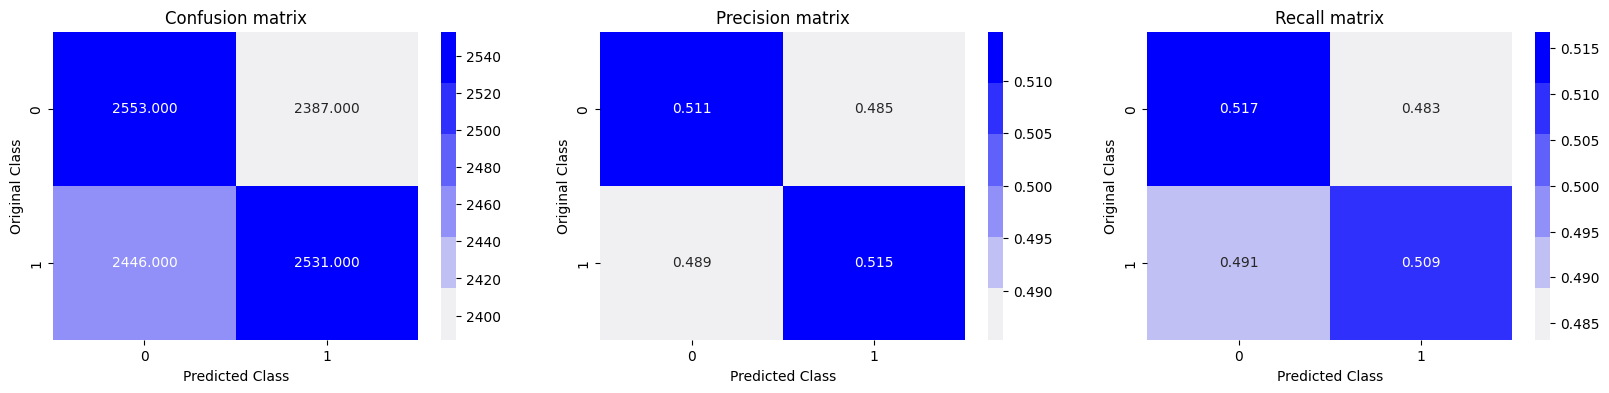

In [50]:
predicted_y = np.zeros((test_len,2))
for i in range(test_len):
    rand_probs = np.random.rand(1,2)
    predicted_y[i] = ((rand_probs/sum(sum(rand_probs)))[0])
print("Log loss on Test Data using Random Model",log_loss(y_test, predicted_y, eps=1e-15))

predicted_y =np.argmax(predicted_y, axis=1)
plot_confusion_matrix(y_test, predicted_y)

##### 7.2 Logistic Regression
- We are training a Logistic Regression model using TF-IDF features. Since the TF-IDF feature dimensionality is manageable, we can use standard Logistic Regression without needing optimizations like Stochastic Gradient Descent (SGD).

For values of alpha =  1e-05 The log loss is: 0.4272359528605472
For values of alpha =  0.0001 The log loss is: 0.42761110268194735
For values of alpha =  0.001 The log loss is: 0.423812686510489
For values of alpha =  0.01 The log loss is: 0.38841543181471955
For values of alpha =  0.1 The log loss is: 0.30913519984395704
For values of alpha =  1 The log loss is: 0.26296936974548424
For values of alpha =  10 The log loss is: 0.25781169000394333
For values of alpha =  100 The log loss is: 0.27534715248211894
For values of alpha =  1000 The log loss is: 0.28668884320552723


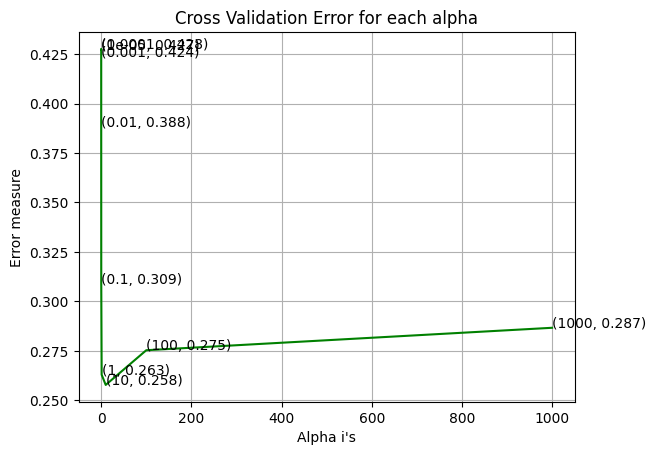

For values of best alpha =  10 The train log loss is: 0.1375434922390295
For values of best alpha =  10 The test log loss is: 0.25781169000394333
Total number of data points : 9917


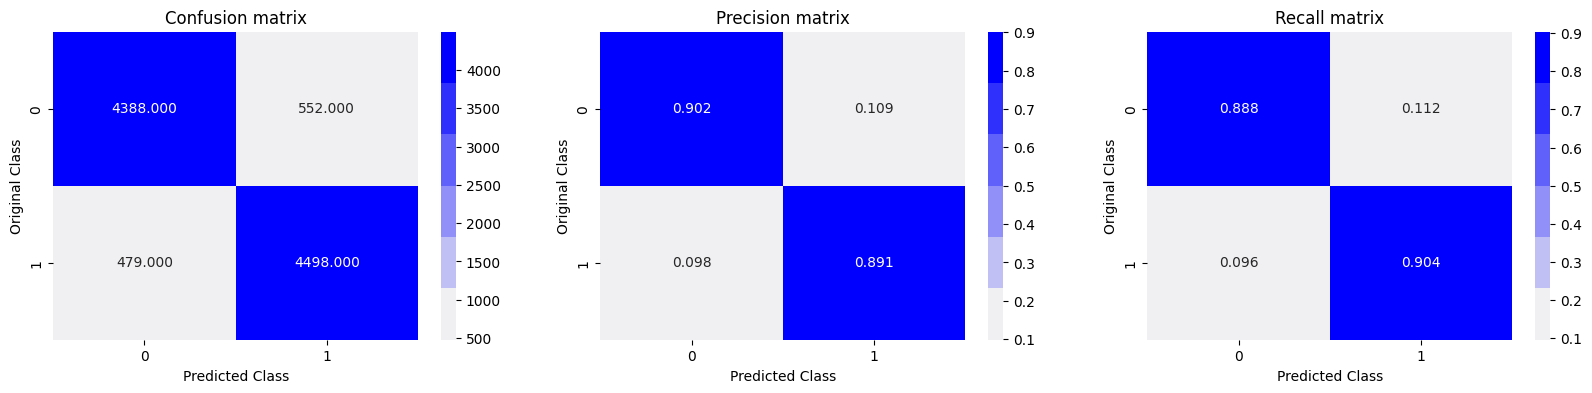

In [51]:
#logistic regression
alpha = [10 ** x for x in range(-5, 4)]
from sklearn.linear_model import LogisticRegression
log_error_array=[]
for i in alpha:
    clf = LogisticRegression(C=i, penalty='l2',solver='liblinear',random_state=42,max_iter=1000)
    clf.fit(X_train_tfidf, y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(X_train_tfidf, y_train)
    predict_y = sig_clf.predict_proba(X_test_tfidf)
    log_error_array.append(log_loss(y_test, predict_y, labels=clf.classes_,))
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_test, predict_y, labels=clf.classes_))
fig, ax = plt.subplots()
ax.plot(alpha, log_error_array,c='g')
for i, txt in enumerate(np.round(log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

best_alpha = np.argmin(log_error_array)
clf = LogisticRegression(C=alpha[best_alpha], penalty='l2', solver='liblinear', random_state=42,max_iter=1000)
clf.fit(X_train_tfidf, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(X_train_tfidf, y_train)

predict_y = sig_clf.predict_proba(X_train_tfidf)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_))
predict_y = sig_clf.predict_proba(X_test_tfidf)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_))
predicted_y =np.argmax(predict_y,axis=1)
print("Total number of data points :", len(predicted_y))
plot_confusion_matrix(y_test, predicted_y)

- The model was trained with an alpha value of 10. It achieved a training log loss of 0.1375 and a test log loss of 0.2578. The difference between these values suggests potential overfitting as the model performs better on the training data than on unseen data.

#### 7.2.1 Logistic Regression with Best Fit:
- While a model with a slightly higher misclassification rate might be preferable to an overfitted one, prioritizing a model where training and test log loss values are closer is generally recommended. This indicates better generalization and a reduced risk of overfitting.

For values of alpha =  0.1 The log loss is: 0.30913519984395704


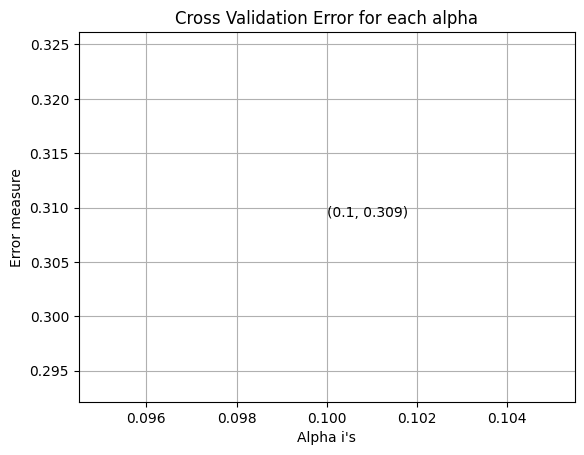

For values of best alpha =  0.1 The train log loss is: 0.2895611057239211
For values of best alpha =  0.1 The test log loss is: 0.30913519984395704
Total number of data points : 9917


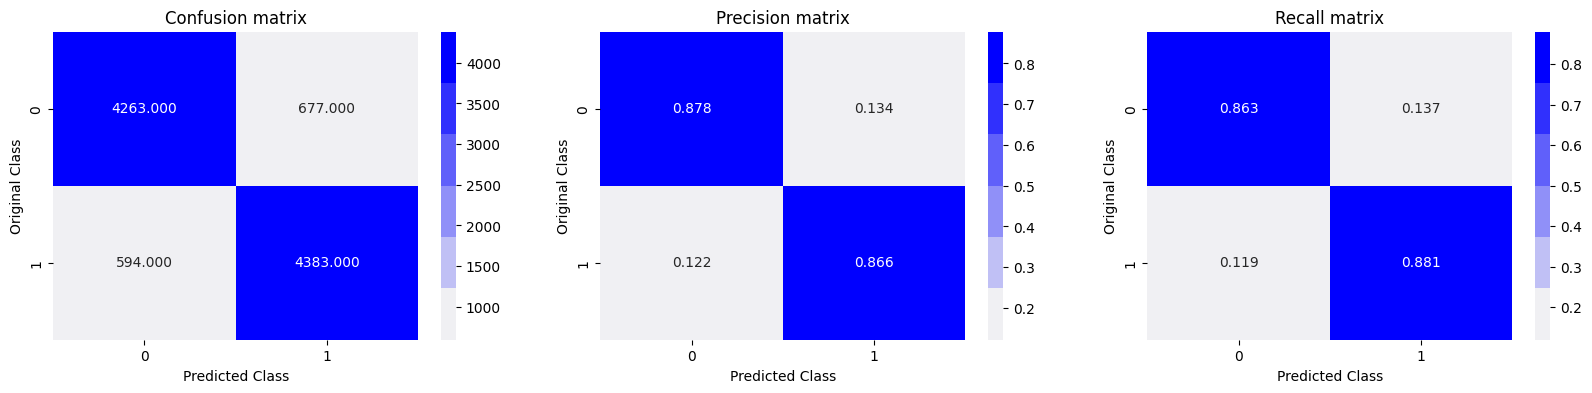

In [52]:
alpha = [0.1]
from sklearn.linear_model import LogisticRegression
log_error_array=[]
for i in alpha:
    clf = LogisticRegression(C=i, penalty='l2',solver='liblinear',random_state=42,max_iter=1000)
    clf.fit(X_train_tfidf, y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(X_train_tfidf, y_train)
    predict_y = sig_clf.predict_proba(X_test_tfidf)
    log_error_array.append(log_loss(y_test, predict_y, labels=clf.classes_))
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_test, predict_y, labels=clf.classes_))
fig, ax = plt.subplots()
ax.plot(alpha, log_error_array,c='g')
for i, txt in enumerate(np.round(log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

best_alpha = np.argmin(log_error_array)
clf = LogisticRegression(C=alpha[best_alpha], penalty='l2', solver='liblinear', random_state=42,max_iter=1000)
clf.fit(X_train_tfidf, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(X_train_tfidf, y_train)

predict_y = sig_clf.predict_proba(X_train_tfidf)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_))
predict_y = sig_clf.predict_proba(X_test_tfidf)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_))
predicted_y =np.argmax(predict_y,axis=1)
print("Total number of data points :", len(predicted_y))
plot_confusion_matrix(y_test, predicted_y)

- The model's performance is similar on both training and testing data. While there's a small difference in the scores, it suggests the model is generalizing reasonably well. This means it's likely to perform similarly on new, unseen data.

##### 7.2.1 SGD Classifier With Logistic Regression Parameter
- Due to the high dimensionality of Bag-of-Words features, we opt for a Stochastic Gradient Descent (SGD) classifier with logistic regression loss for training our model. This approach is more computationally efficient compared to standard logistic regression for large datasets.

For values of alpha =  1e-05 The log loss is: 0.3105479313810846
For values of alpha =  0.0001 The log loss is: 0.30428898053111536
For values of alpha =  0.001 The log loss is: 0.32634155463943243
For values of alpha =  0.01 The log loss is: 0.3949214852869194
For values of alpha =  0.1 The log loss is: 0.46920445417201584
For values of alpha =  1 The log loss is: 0.5038784731546301
For values of alpha =  10 The log loss is: 0.5101255491441109


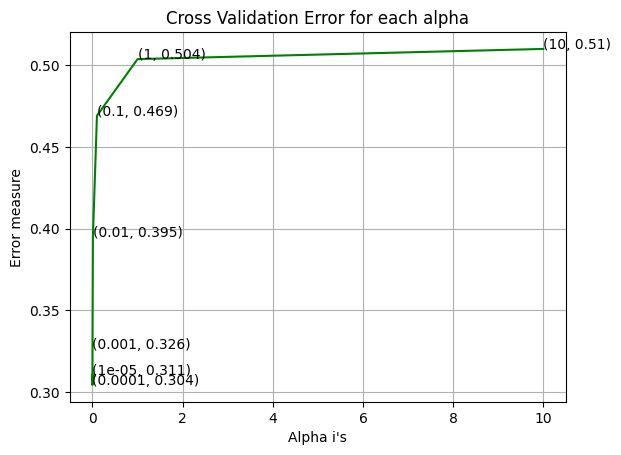

For values of best alpha =  0.0001 The train log loss is: 0.06905665977298953
For values of best alpha =  0.0001 The test log loss is: 0.30428898053111536
Total number of data points : 9917


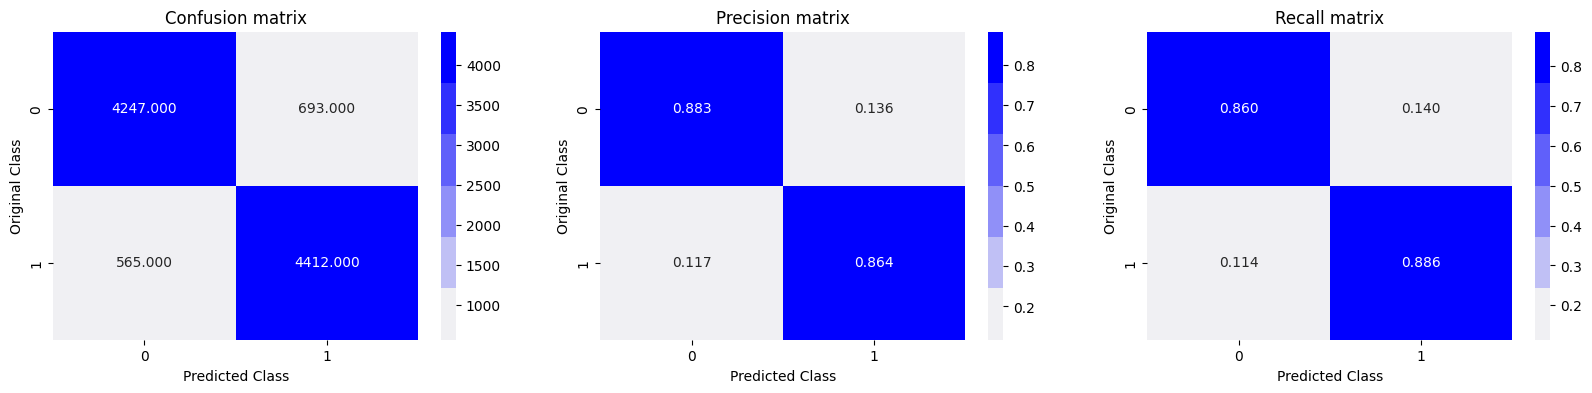

In [53]:
alpha = [10 ** x for x in range(-5, 2)] # hyperparam for SGD classifier.
log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l2', loss='log_loss', random_state=42,max_iter=1000)
    clf.fit(X_train_bow, y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(X_train_bow, y_train)
    predict_y = sig_clf.predict_proba(X_test_bow)
    log_error_array.append(log_loss(y_test, predict_y, labels=clf.classes_))
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_test, predict_y, labels=clf.classes_))
fig, ax = plt.subplots()
ax.plot(alpha, log_error_array,c='g')
for i, txt in enumerate(np.round(log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

best_alpha = np.argmin(log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log_loss', random_state=42,max_iter=1000)
clf.fit(X_train_bow, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(X_train_bow, y_train)

predict_y = sig_clf.predict_proba(X_train_bow)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_))
predict_y = sig_clf.predict_proba(X_test_bow)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_))
predicted_y =np.argmax(predict_y,axis=1)
print("Total number of data points :", len(predicted_y))
plot_confusion_matrix(y_test, predicted_y)


- The model was trained with an optimal alpha value of 0.0001. It achieved a low training log loss, indicating good fit to the training data. However, the test log loss is significantly higher, suggesting potential overfitting.

#### 8 Conclusions:
- A Logistic Regression model trained on TF-IDF features with an alpha value of 10 produced the best confusion matrix. However, the model exhibits significant overfitting, as evidenced by the substantial gap between its training and test log loss values.
- Despite a slightly higher misclassification rate, the model trained with alpha = 0.1 demonstrates a smaller gap between training and test log loss. This suggests a balance between underfitting and overfitting, indicating a potentially optimal model.
- An SGD classifier trained on Bi-gram Bag-of-Words features with logistic regression parameters exhibits significant overfitting. Despite a low misclassification rate, the substantial gap between training and test log loss indicates that the model has learned the training data too closely and is likely to perform poorly on unseen data